* IMDB dataset을 이용한 영화 리뷰 분류

In [2]:
from keras.datasets import imdb

from keras import models
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

* import data from data sets
* 아래는 데이터 형태를 출력한 것이며, 첫 번째 리뷰 하나를 영어로 변환하여 출력하였다.

In [4]:
print(train_data[0])
print(train_labels[0])

word_idx = imdb.get_word_index()
reverse_word_idx = dict(
[(value, key) for (key, value) in word_idx.items()])
decoded_review = ' '.join([reverse_word_idx.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
? this film was just brilliant casting location scenery st

* 정수 시퀀스를 이진 행렬로 인코딩
> * 리스트를 one-hot encoding 하여 0과 1의 벡터로 변환
> * 부동 소수 벡터 데이터를 다룰 수 있는 Dense 층을 신경망의 첫 번째 층으로 사용

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[0])

# label
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

[0. 1. 1. ... 0. 0. 0.]


In [6]:
# build model

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


* Hidden layer: 2
* Hidden unint: 16, 16
* output: 1

* **활성화 함수가 없다면**
> Dense에서 output = dot(W, input) + b  
> 이 층은 입력에 대한 선형 변환(아핀 변환)만 학습 가능  
> **층을 추가해도 가설 공간이 확장되지 않음** (층을 쌓는 장점이 없다)  

In [7]:
# loss function & optimizer

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

* 확률 출력 모델에선 cross entropy가 적합!
* 회귀 문제에서는 MSE

In [8]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [9]:
# Validate training

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

* 512개의 sample씩 mini-batch를 만들어 20 epochs만큼 훈련

In [10]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.5083 - acc: 0.7819 - val_loss: 0.3789 - val_acc: 0.8697
Epoch 2/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.3002 - acc: 0.9046 - val_loss: 0.3001 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.2178 - acc: 0.9280 - val_loss: 0.3086 - val_acc: 0.8712
Epoch 4/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.1750 - acc: 0.9438 - val_loss: 0.2839 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.1426 - acc: 0.9543 - val_loss: 0.2848 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.1150 - acc: 0.9652 - val_loss: 0.3143 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 2s 153us/step - 

* model.fit() method는 history 객체 반환
* 이 객체는 훈련하는 동안 발생한 모든 정보를 담고있는 딕셔너리 history 속성을 갖는다

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

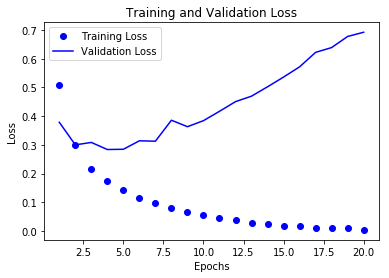

In [12]:
# draw training & validation loss

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

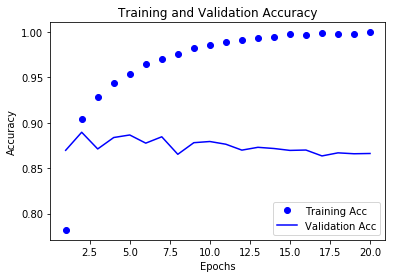

In [13]:
# draw training & validation accuracy

plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# train again!

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print(results)

Epoch 1/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.4584 - acc: 0.8133
Epoch 2/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.2630 - acc: 0.9095
Epoch 3/4
 5120/25000 [=====>........................] - ETA: 2s - loss: 0.1923 - acc: 0.9387